In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install top2vec
!pip install bertopic
!pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import plotly.express as px
import datetime
from top2vec import Top2Vec
from bertopic import BERTopic

In [5]:
attorney = pd.read_csv("/content/drive/MyDrive/Data to share/data/attorneys.csv")
attorneytime = pd.read_csv("/content/drive/MyDrive/Data to share/data/attorneytimeentries.csv")
categories = pd.read_csv("/content/drive/MyDrive/Data to share/data/categories.csv")
clients = pd.read_csv("/content/drive/MyDrive/Data to share/data/clients.csv")
questions = pd.read_csv("/content/drive/MyDrive/Data to share/data/questions.csv")
statessites = pd.read_csv("/content/drive/MyDrive/Data to share/data/statesites.csv")
subcategories = pd.read_csv("/content/drive/MyDrive/Data to share/data/subcategories.csv")
questionposts = pd.read_csv("/content/drive/MyDrive/Data to share/data/questionposts.csv", sep = ',')

<ipython-input-5-3d5fd597df81>:8: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,2

In [69]:
display(attorneytime.head())
display(questions)
display(subcategories.head())
display(questionposts.head())

,Id,StateAbbr,TimeEntryUno,AttorneyUno,Hours,EnteredOnUtc
0,1,AK,44954D1D-C354-41F6-8C33-327E866B6BA3,C126C566-9039-4991-BDD8-0CDD05C27DDF,1.8,2017-01-05 21:25:23
1,2,AL,F1D8F733-1BDB-47FD-BC7C-CB512E2C5A3A,F8C0E3D3-B3A5-42B9-9E2F-2A637BA83D6E,0.4,2020-03-24 01:10:56
2,3,AR,81ED2628-2FF4-4B67-86B1-F9DFEC603C15,34BFCC3D-B107-4164-B405-DEFF63A65B2D,0.4,2016-12-02 23:21:46
3,4,AZ,14B1BCC4-CEF6-4108-AB54-3CDE482845F0,875DB0F4-619B-4A13-8104-85A3C15D90C4,0.8,2015-12-16 20:32:55
4,5,CA,41275A72-CD69-4A42-85FB-E3E4FEE0C316,22746734-D076-4AC8-BA66-50426C01093C,3.0,2020-09-04 00:02:54


,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202874,202875,NC,376FFF48-9068-4A8F-9316-2EB5A7E38001,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,82BDD11F-2168-4A44-BBFC-BA9B0543F289,2019-06-17 20:37:01,6E43EC98-8700-4439-98A9-52B663CCE348,2019-07-17 19:22:29,6E43EC98-8700-4439-98A9-52B663CCE348,2019-07-27 19:26:43,NaN
202875,202876,NC,98AA49B1-D423-4D12-9E70-A5BD6663DFE5,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,FF2959DA-CCA4-415A-BA9B-2D51F860C08D,2019-06-18 13:06:00,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 03:07:59,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:56,2019-06-18 00:00:00
202876,202877,NC,B80305AA-7509-436E-AFF8-6B33AC682730,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,35133217-A30F-42A7-8EB4-E15A03026247,2019-06-18 15:33:13,NaN,NaN,NaN,2019-08-13 15:10:18,2019-06-27 00:00:00
202877,202878,NC,DC374484-7C6E-44A3-9DB7-89B8868518F1,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,26D3CE4B-3540-477E-BA03-78EF65769A12,Other,A40F8543-330C-43A1-97AC-53C01FD4013E,2019-06-19 03:23:46,6E43EC98-8700-4439-98A9-52B663CCE348,2019-06-24 14:47:57,6E43EC98-8700-4439-98A9-52B663CCE348,2019-06-28 21:59:13,2019-07-01 00:00:00


,Id,StateAbbr,CategoryUno,SubcategoryUno,Subcategory
0,1,AK,2D43B4FD-FAC8-47C3-A891-085F5D74D64B,546C6AD6-4D2B-4B1D-B09F-8016C5B02D66,COVID-19-Housing
1,2,AK,2D43B4FD-FAC8-47C3-A891-085F5D74D64B,572148E8-96C7-4B74-8280-B749191C5B4C,COVID-19-Insurance
2,3,AK,2D43B4FD-FAC8-47C3-A891-085F5D74D64B,5AA5088E-3A9D-4D99-B6FE-69122C34194A,COVID-19-Lost Documents
3,4,AK,D3504F18-AC99-408B-B1D2-230DC130F9EC,E5DF5CEB-649F-47B3-B665-1BEB3EA4AD42,Emancipation and Delinquency
4,5,AK,BF144F3C-5743-47C5-9EEB-418FF0FAF0D8,16E4350E-BC59-40B7-BF72-0BC225ECA4D1,Immigration


,Id,StateAbbr,QuestionUno,PostText,CreatedUtc,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 399,Unnamed: 400,Unnamed: 401,Unnamed: 402,Unnamed: 403,Unnamed: 404,Unnamed: 405,Unnamed: 406,Unnamed: 407,Unnamed: 408
0,1,AK,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,Do you still need help with this issue? It ha...,4/25/18 18:09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AK,C579CE49-6B7A-44E7-A203-5D3E52623804,"Anyone?,",4/17/18 21:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AK,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,"Yes, those are the right forms. I'm sorry, I ...",4/18/18 17:51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AK,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,"Hi ###,You do make some good points. The diff...",4/18/18 22:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AK,B4C814C9-8983-413F-8BC4-F2BE01665555,My father passed away and I have DNA test resu...,4/12/18 10:52,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
display(questions.Category.unique())


array(['Family and Children', 'Individual Rights',
       'Consumer Financial Questions', 'Housing and Homelessness',
       'Other', 'Income Maintenance', 'Health and Disability',
       'Work, Employment and Unemployment', 'Juvenile', 'Education'],
      dtype=object)

In [7]:
df_state = attorney[attorney.columns[:5]]
df_state

,Id,StateAbbr,AttorneyUno,City,County
0,1,NH,7A2C12BE-9F37-4C9D-A6ED-41B916820CE0,Concord,Cheshire
1,2,NH,29A49AA6-047E-4008-ABBD-3DE57156B526,Concord,Merrimack
2,3,MS,9DF11B65-7F29-452C-A69E-54CD72E4A116,Jackson,Rankin
3,4,VA,693FD55F-5F58-405A-B389-5E78B3406497,Richmond,Richmond (city)
4,5,CT,0AC2A866-19CD-4D1A-94B7-BF41A1430553,Wethersfield,Hartford
...,...,...,...,...,...
11539,11540,VA,F2EC8DAD-D7B0-40B8-AFF2-F5705E2F59B0,Washington,Arlington
11540,11541,VA,386CD203-A6E0-4C8F-90D3-0EEEC2701CA3,Virginia Beach,Virginia Beach city
11541,11542,VA,1C366F1B-0990-4847-8B47-D56D426AD964,Virginia Beach,Virginia Beach city
11542,11543,VA,FE8B3662-7C55-416A-B123-C3F9A9F3CAFA,Richmond,Richmond city


# What's the hottest time for questions and how can we align the services such that attorneys will have maximum time with the client

There are a few columns in questions which have the UTC for when the question was asked by client and taken by attorney. Which can be used to understand when were the questions asked on and when are they being taken on (keeping an account of the legal deadline).

An interesting way to look at this was checking the number of questions being asked at a particular time then, possibly trying to engage lawyers during that time so, there can be an immediate resolve.

Secondly, we can make a utility function which can optimize takenOnUtc on the difference between askedOnUtc and LegalDeadline if the LegalDeadline is NaN we can take ClosedOnUtc.


Making a sub dataframe to include the columns interested in from questions df

In [8]:
questions_time = questions[["Id","Category","Subcategory","AskedOnUtc","TakenOnUtc","ClosedOnUtc","LegalDeadline"]]
display(questions_time.head())
questions_time.dtypes

,Id,Category,Subcategory,AskedOnUtc,TakenOnUtc,ClosedOnUtc,LegalDeadline
0,1,Family and Children,Family/Divorce/Custody/Visitation/Child Support,2019-06-19 22:10:06,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,Individual Rights,Civil/Constitutional Rights,2019-06-19 23:34:36,NaN,2019-08-13 15:09:14,NaN
2,3,Individual Rights,Civil/Constitutional Rights,2019-06-19 23:57:18,2019-06-22 02:37:16,2019-06-24 19:02:35,NaN
3,4,Family and Children,Family/Divorce/Custody/Visitation/Child Support,2019-06-20 02:33:14,2019-07-27 18:04:08,2019-07-31 05:49:18,NaN
4,5,Consumer Financial Questions,"Bankruptcy, Debts & Purchases",2019-06-20 17:04:47,NaN,2019-08-13 15:09:20,NaN


Id                int64
Category         object
Subcategory      object
AskedOnUtc       object
TakenOnUtc       object
ClosedOnUtc      object
LegalDeadline    object
dtype: object

In [9]:
def dateTime(data,list_column):
  for i in list_column:
    data[i] =  pd.to_datetime(data[i],errors = 'coerce', format = "%Y-%m-%d")

column_list = ["AskedOnUtc","TakenOnUtc","ClosedOnUtc","LegalDeadline"]
dateTime(questions_time,column_list)
questions_time['DeltaClienttoLegalTime']= questions_time['LegalDeadline'] - questions_time['AskedOnUtc']
questions_time['DeltaClienttoClosedTime']= questions_time['ClosedOnUtc'] - questions_time['AskedOnUtc']
questions_time['DeltaClienttoTakenTime']= questions_time['ClosedOnUtc'] - questions_time['AskedOnUtc']
display(questions_time)
questions_time.dtypes

,Id,Category,Subcategory,AskedOnUtc,TakenOnUtc,ClosedOnUtc,LegalDeadline,DeltaClienttoLegalTime,DeltaClienttoClosedTime,DeltaClienttoTakenTime
0,1,Family and Children,Family/Divorce/Custody/Visitation/Child Support,2019-06-19 22:10:06,NaT,2019-08-13 15:09:06,2019-07-08,18 days 01:49:54,54 days 16:59:00,54 days 16:59:00
1,2,Individual Rights,Civil/Constitutional Rights,2019-06-19 23:34:36,NaT,2019-08-13 15:09:14,NaT,NaT,54 days 15:34:38,54 days 15:34:38
2,3,Individual Rights,Civil/Constitutional Rights,2019-06-19 23:57:18,2019-06-22 02:37:16,2019-06-24 19:02:35,NaT,NaT,4 days 19:05:17,4 days 19:05:17
3,4,Family and Children,Family/Divorce/Custody/Visitation/Child Support,2019-06-20 02:33:14,2019-07-27 18:04:08,2019-07-31 05:49:18,NaT,NaT,41 days 03:16:04,41 days 03:16:04
4,5,Consumer Financial Questions,"Bankruptcy, Debts & Purchases",2019-06-20 17:04:47,NaT,2019-08-13 15:09:20,NaT,NaT,53 days 22:04:33,53 days 22:04:33
...,...,...,...,...,...,...,...,...,...,...
202874,202875,Other,Civil Procedure,2019-06-17 20:37:01,2019-07-17 19:22:29,2019-07-27 19:26:43,NaT,NaT,39 days 22:49:42,39 days 22:49:42
202875,202876,Other,Civil Procedure,2019-06-18 13:06:00,2019-06-22 03:07:59,2019-06-24 19:02:56,2019-06-18,-1 days +10:54:00,6 days 05:56:56,6 days 05:56:56
202876,202877,Other,Civil Procedure,2019-06-18 15:33:13,NaT,2019-08-13 15:10:18,2019-06-27,8 days 08:26:47,55 days 23:37:05,55 days 23:37:05
202877,202878,Other,Other,2019-06-19 03:23:46,2019-06-24 14:47:57,2019-06-28 21:59:13,2019-07-01,11 days 20:36:14,9 days 18:35:27,9 days 18:35:27


Id                                   int64
Category                            object
Subcategory                         object
AskedOnUtc                  datetime64[ns]
TakenOnUtc                  datetime64[ns]
ClosedOnUtc                 datetime64[ns]
LegalDeadline               datetime64[ns]
DeltaClienttoLegalTime     timedelta64[ns]
DeltaClienttoClosedTime    timedelta64[ns]
DeltaClienttoTakenTime     timedelta64[ns]
dtype: object

First plot : what time are lot of people asking questions i.e., the hot takes.

2021-01-01     68
2021-01-02     86
2021-01-03     72
2021-01-04    228
2021-01-05    232
             ... 
2021-12-27    132
2021-12-28    155
2021-12-29    160
2021-12-30    158
2021-12-31     76
Freq: D, Name: AskedOnUtc, Length: 365, dtype: int64

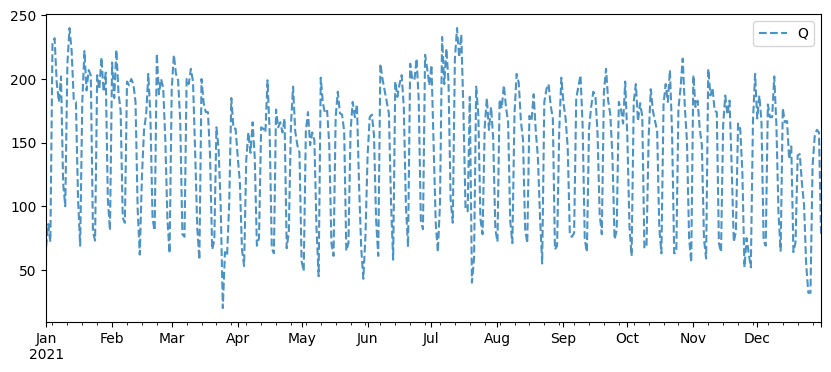

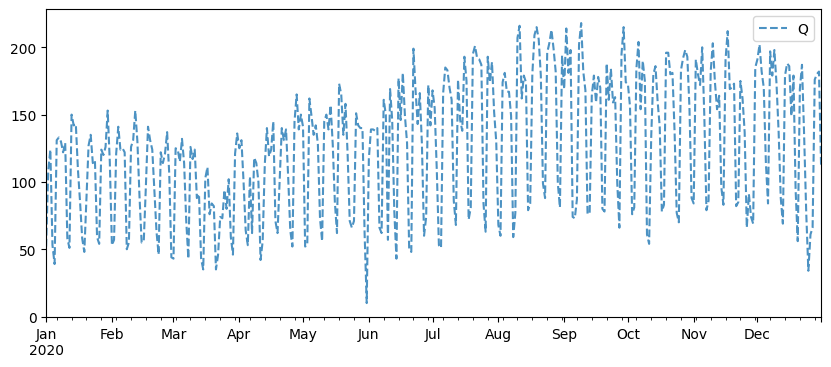

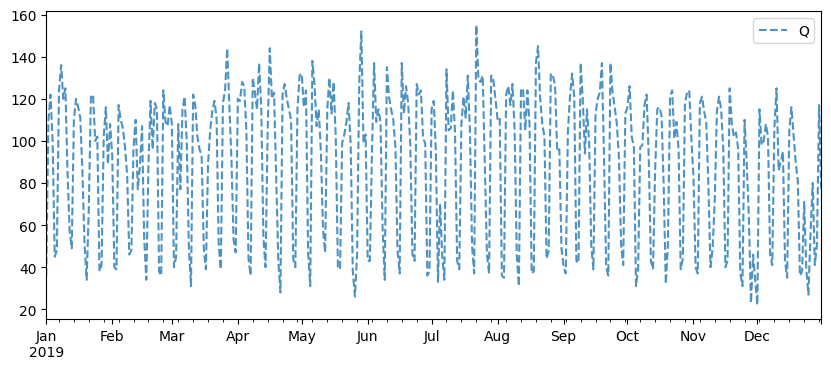

In [10]:
askeddf = questions_time[questions_time.columns[0:4:3]]
mask = askeddf['AskedOnUtc'].dt.year == int(2021)
y = askeddf[mask]
sum_data = y['AskedOnUtc'].value_counts().resample('D').sum()
display(sum_data)

fig, ax = plt.subplots(figsize=(10, 4))
sum_data.plot(ax=ax,linestyle = "--", alpha = 0.8)
ax.legend("Qs")

mask = askeddf['AskedOnUtc'].dt.year == int(2020)
y = askeddf[mask]
sum_data = y['AskedOnUtc'].value_counts().resample('D').sum()
fig, ax = plt.subplots(figsize=(10, 4))
sum_data.plot(ax=ax,linestyle = "--", alpha = 0.8)
ax.legend("Qs")

mask = askeddf['AskedOnUtc'].dt.year == int(2019)
y = askeddf[mask]
sum_data = y['AskedOnUtc'].value_counts().resample('D').sum()
fig, ax = plt.subplots(figsize=(10, 4))
sum_data.plot(ax=ax,linestyle = "--", alpha = 0.8)
ax.legend("Qs")

In [11]:
# deltadf = questions_time[['DeltaClienttoLegalTime','DeltaClienttoClosedTime','DeltaClienttoTakenTime']]

# def timetofloat(data,column):
#   for i in data[column]:
#     time_d_float[i]= data[column][i].total_seconds()

#   display(time_d_float)

# time_d_float = deltadf['DeltaClienttoLegalTime'][0].total_seconds()
# timetofloat(deltadf,'DeltaClienttoLegalTime')



# time_d_float1 = questions_time['DeltaClienttoClosedTime'].days.apply(np.float32)
# time_d_float2 = questions_time['DeltaClienttoClosedTime'].days.apply(np.float32)
# time_d_float3 = questions_time['DeltaClienttoTakenTime'].days.apply(np.float32)
# print(time_d_float)
# a = time_d_float1
# b =  time_d_float2
# c = time_d_float3
# common_params = dict(bins=20, 
#                      range=(-5, 5), 
#                      normed=True)
# plt.subplot(312)
# plt.title('Skinny shift - 3 at a time')
# plt.hist((a, b, c), **common_params)

In [12]:
# questions_time.groupby(questions_time["AskedOnUtc"].dt.year, questions_time["AskedOnUtc"].dt.month).count().plot(kind="bar")
# fig, ax = plt.subplots(figsize=(10, 4))
# askedOndf.groupby(questions_time["AskedOnUtc"]).count().plot(ax=ax, linestyle="--", alpha=0.8)
# questions_time.rolling("1d").max()["AskedOnUtc"].plot(ax=ax, alpha=0.8, linewidth=3)
# ax.legend(["Original", "Day's max"])

In [49]:
posts = questionposts.PostText
doc = posts.to_list() 
first = doc[:6000]
model = BERTopic(verbose=True)
topics, probs = model.fit_transform(first)

Batches:   0%|          | 0/188 [00:00<?, ?it/s]

2023-04-30 19:15:57,478 - BERTopic - Transformed documents to Embeddings
2023-04-30 19:16:41,742 - BERTopic - Reduced dimensionality
2023-04-30 19:16:41,999 - BERTopic - Clustered reduced embeddings


In [52]:
model.get_topic(6)

[('guardianship', 0.062334685917339414),
 ('guardian', 0.01981130483612624),
 ('her', 0.012877074511217395),
 ('you', 0.012258633019578729),
 ('petition', 0.01216175093099035),
 ('the', 0.012069063913932015),
 ('consent', 0.011607427481072853),
 ('to', 0.011591256576105293),
 ('father', 0.011529965303440902),
 ('mother', 0.01135879133247035)]

In [53]:
model.visualize_topics()

'Family and Children', 'Individual Rights',
       'Consumer Financial Questions', 'Housing and Homelessness',
       'Other', 'Income Maintenance', 'Health and Disability',
       'Work, Employment and Unemployment', 'Juvenile', 'Education']

In [54]:
model.visualize_heatmap()

In [55]:
model.save("questions6000")

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
poststate = questionposts[['PostText','StateAbbr']]
poststate